In [15]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import matplotlib.pyplot as plt
import io
%pylab inline

# Read recipe inputs
full_data_prepared = dataiku.Dataset("full_data_prepared")
full_data_prepared_df = full_data_prepared.get_dataframe()

Populating the interactive namespace from numpy and matplotlib


In [7]:
# extract train set
train_df=full_data_prepared_df.dropna(subset=['site_eui'])
N=len(train_df)

In [8]:
# calculate missing values
missing_df=train_df.isnull().sum()/N*100
missing_df=missing_df[missing_df!=0]
missing_df

year_built                    2.424858
energy_star_rating           35.256148
direction_max_wind_speed     54.228652
direction_peak_wind_speed    55.190939
max_wind_speed               54.228652
days_with_fog                60.451179
dtype: float64

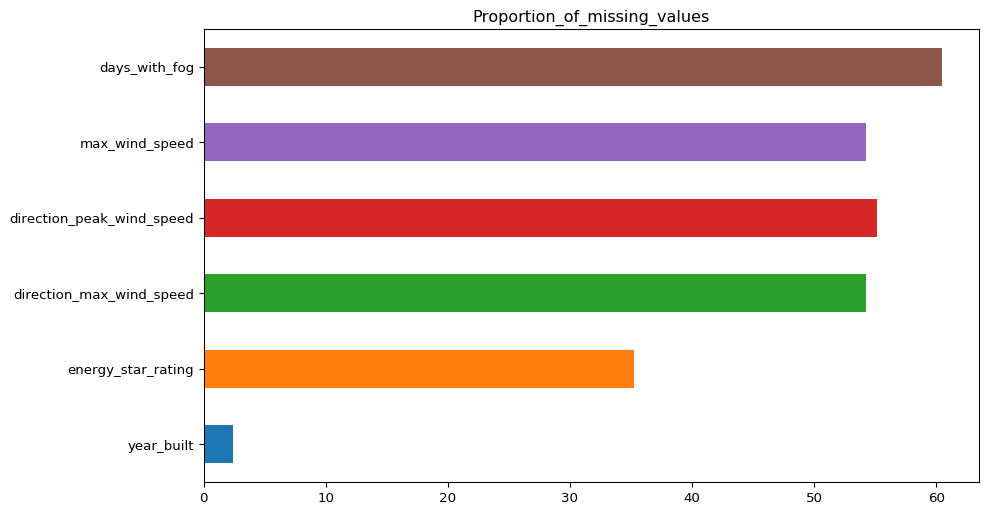

In [23]:
from dataiku import insights
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 600/my_dpi), dpi=my_dpi)
missing_df.plot.barh(title='Proportion_of_missing_values')
# save as insights
insights.save_figure('Proportion_of_missing_values')

bs=io.BytesIO()
plt.savefig(bs,format='png')
folder=dataiku.Folder("5YbetAty")
folder.upload_stream("fig.png",bs.getvalue())